# Libraries

In [1]:
import pandas as pd
import requests
from missingno import matrix

## No row & column limit

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data import

In [3]:
# Base url with API endpoint
BASE_URL = "https://data.sonomacounty.ca.gov/resource/924a-vesw.json" # This is a json file

In [4]:
# Parameters
BATCH_SIZE = 1000
offset = 0
all_data = []

while True:
    params = {
        "$limit": BATCH_SIZE,
        "$offset": offset
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    batch = response.json()
    if not batch:
        break
    all_data.extend(batch)
    offset += BATCH_SIZE
    print(f"Fetched {offset} records...")

# Convert to DataFrame
df = pd.DataFrame(all_data)
print(f"Total records fetched: {len(df)}")

Fetched 1000 records...
Fetched 2000 records...
Fetched 3000 records...
Fetched 4000 records...
Fetched 5000 records...
Fetched 6000 records...
Fetched 7000 records...
Fetched 8000 records...
Fetched 9000 records...
Fetched 10000 records...
Fetched 11000 records...
Fetched 12000 records...
Fetched 13000 records...
Fetched 14000 records...
Fetched 15000 records...
Fetched 16000 records...
Fetched 17000 records...
Fetched 18000 records...
Fetched 19000 records...
Fetched 20000 records...
Fetched 21000 records...
Fetched 22000 records...
Fetched 23000 records...
Fetched 24000 records...
Fetched 25000 records...
Fetched 26000 records...
Fetched 27000 records...
Fetched 28000 records...
Fetched 29000 records...
Fetched 30000 records...
Fetched 31000 records...
Total records fetched: 30578


In [5]:
df.head()

,type,breed,color,sex,size,impound_number,kennel_number,id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,intake_total,name,date_of_birth,outcome_jurisdiction,zip_code,location,:@computed_region_dig5_f3vy
0,OTHER,BAT,BROWN,Unknown,SMALL,K24-047892,EUTH,A425283,2024-03-16T00:00:00.000,2024-03-24T00:00:00.000,8,QUARANTINE,OVER THE COUNTER,TRANSFER,LAB FRA,UNKNOWN,DEAD,COUNTY,1,NaN,NaN,NaN,NaN,NaN,NaN
1,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,K23-046984,DA21,A422697,2023-12-04T00:00:00.000,2024-01-08T00:00:00.000,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,1,NaN,NaN,NaN,NaN,NaN,NaN
2,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,K19-032986,DA35,A389457,2019-07-16T00:00:00.000,2019-08-30T00:00:00.000,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,1,PINTO,2016-07-27T00:00:00.000,COUNTY,95407,"{'latitude': '38.4127094', 'longitude': '-122....",26079
3,DOG,PIT BULL,GRAY,Female,MED,K23-046923,DS60,A422443,2023-11-28T00:00:00.000,2024-01-08T00:00:00.000,41,STRAY,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,1,NaN,NaN,NaN,NaN,NaN,NaN
4,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,K23-046766,DS80,A422038,2023-11-11T00:00:00.000,2024-01-08T00:00:00.000,58,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,1,NaN,2021-11-11T00:00:00.000,NaN,NaN,NaN,NaN


# EDA

## Missing values

<Axes: >

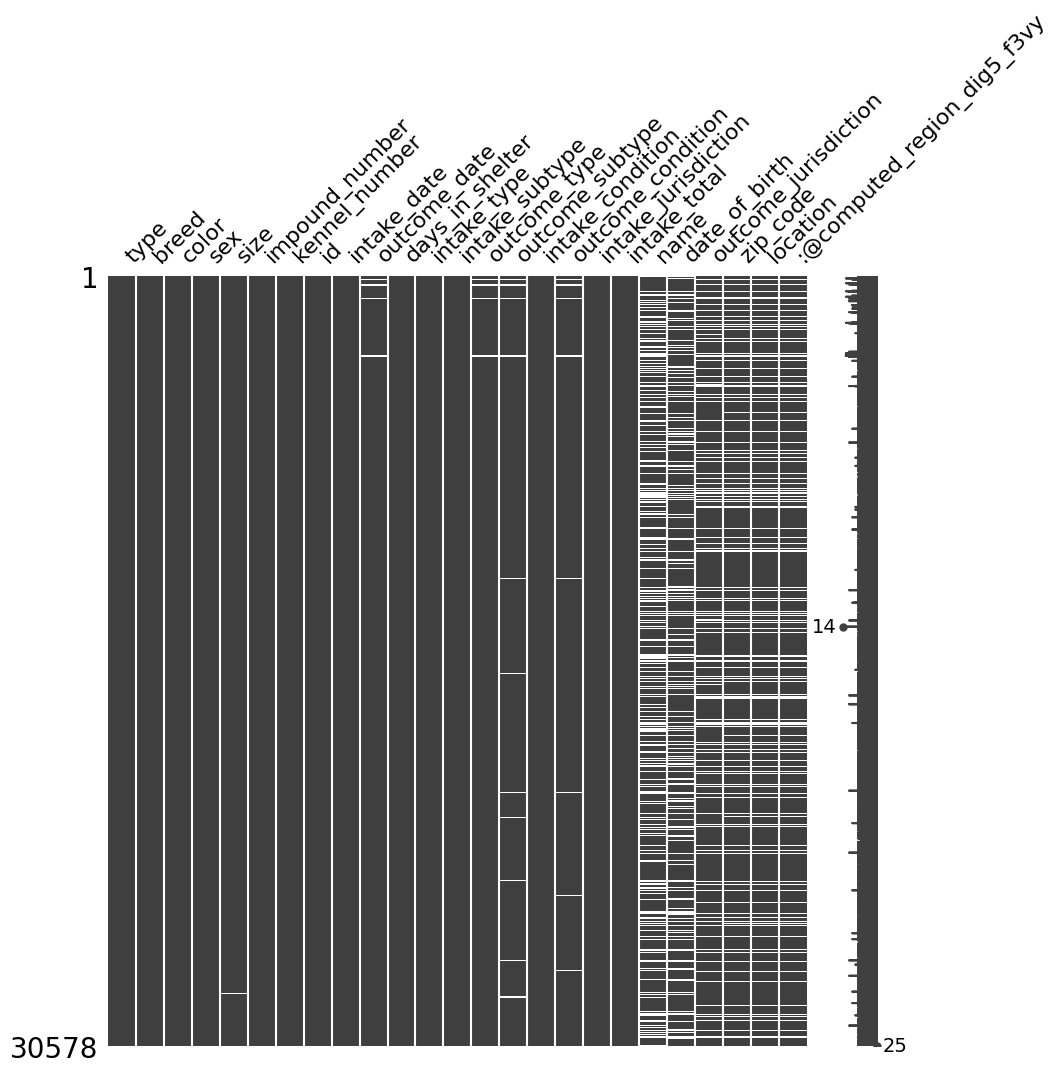

In [6]:
matrix(df, figsize=(10, 10))

In [7]:
# Number of missing values as percentage
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

type                            0.000000
breed                           0.000000
color                           0.000000
sex                             0.000000
size                            0.117732
impound_number                  0.000000
kennel_number                   0.026163
id                              0.000000
intake_date                     0.000000
outcome_date                    0.467656
days_in_shelter                 0.000000
intake_type                     0.000000
intake_subtype                  0.000000
outcome_type                    0.490549
outcome_subtype                 1.602459
intake_condition                0.000000
outcome_condition               1.680947
intake_jurisdiction             0.000000
intake_total                    0.000000
name                           26.188763
date_of_birth                  24.275623
outcome_jurisdiction           14.536595
zip_code                       14.480999
location                       14.480999
:@computed_regio